In [1]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 39.9 s


In [2]:
df = pd.read_csv("C:\\Users\\Gamer\\Downloads\\PollBase-Q3-2022_MonthlyAverage.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Conservative', 'Unnamed: 3', 'Labour',
       'Unnamed: 5', 'LD', 'Unnamed: 7', 'UKIP', 'Unnamed: 9', 'SDP', 'TIG',
       'Unnamed: 12', 'BXP', 'Unnamed: 14', 'Green', 'Unnamed: 16',
       'Unnamed: 17', 'Lead', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [6]:
df_orig = df.copy()

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Conservative', 'Unnamed: 3', 'Labour',
       'Unnamed: 5', 'LD', 'Unnamed: 7', 'UKIP', 'Unnamed: 9', 'SDP', 'TIG',
       'Unnamed: 12', 'BXP', 'Unnamed: 14', 'Green', 'Unnamed: 16',
       'Unnamed: 17', 'Lead', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [10]:
df = df[ ['Unnamed: 1', 'Conservative', 'Labour',
       'LD', 'UKIP', 'SDP', 'TIG',
       'BXP', 'Green', 'Lead', ] ]

In [13]:
df.columns = ['Date', 'Conservative', 'Labour', 'LD', 'UKIP', 'SDP', 'TIG',
       'BXP', 'Green', 'Lead']

In [21]:
df.loc[df["Date"]=="GE","Date"] = ["GE83","GE87","GE92","GE97","GE01","GE05","GE10","GE15","GE17","GE19"]

In [28]:
df_GE = df[df["Date"].apply(lambda x: "GE" in x)]

In [30]:
df_Poll = df[df["Date"].apply(lambda x: "GE" not in x)]

In [35]:
df[df["Date"].apply(lambda x: re.match("20|21|22",x) )]

KeyError: "None of [Index([None, None, None, None, None, None, None, None, None, None,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=491)] are in the [columns]"

In [43]:
df["Date"].apply(lambda x: re.search("Aug-22",x) == True ).sum()

0

In [45]:
# (df["Date"]=="Aug-22").sum()

In [63]:
df_post19 = df[df["Date"].apply(lambda x: re.search("20|21|22",x) is not None)]

In [65]:
df_post19.columns

Index(['Date', 'Conservative', 'Labour', 'LD', 'UKIP', 'SDP', 'TIG', 'BXP',
       'Green', 'Lead'],
      dtype='object')

In [70]:
df_post19 = df_post19[ ['Date', 'Conservative', 'Labour', 'LD', 'UKIP', 'BXP',
       'Green', 'Lead'] ].set_index("Date").drop(["Oct-22","Nov-22","Dec-22"])

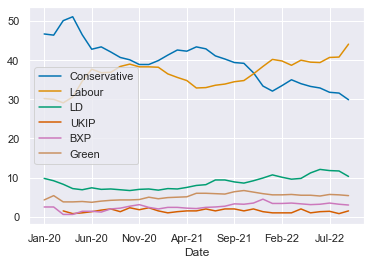

In [74]:
df_post19.drop("Lead",axis=1).plot()

In [82]:
df_post19.drop("Lead",axis=1).columns

Index(['Conservative', 'Labour', 'LD', 'UKIP', 'BXP', 'Green'], dtype='object')

In [145]:
df_flat = df_post19.drop("Lead",axis=1)
df_flat.columns = ['CON', 'LAB', 'LD', 'UKIP', 'BXP', 'GRN']
df_flat["UKIP"] = df_flat["UKIP"].fillna(df_flat["UKIP"].median())
df_flat["LAB+LD"] = df_flat["LAB"]+df_flat["LD"]
df_flat["LAB+LD+GRN"] = df_flat["LAB"]+df_flat["LD"]+df_flat["GRN"]
df_flat["CON+BXP"] = df_flat["CON"]+df_flat["BXP"]
df_flat["CON+BXP+UKIP"] = df_flat["CON"]+df_flat["BXP"]+df_flat["UKIP"]

df_flat["CON+LD"] = df_flat["CON"]+df_flat["LD"]
df_flat["LAB+BXP"] = df_flat["LAB"]+df_flat["BXP"]
df_flat["UKIP+BXP"] = df_flat["UKIP"]+df_flat["BXP"]
df_flat["LD+GRN"] = df_flat["LD"]+df_flat["GRN"]

df_flat = df_flat.reset_index().melt("Date")
df_flat.columns = ["Date","Party","Voteshare"]

df_flat["Date_full"] = df_flat["Date"].apply(lambda x: pd.to_datetime(x,format="%b-%y"))
df_flat["Days Since GE"] = ((df_flat["Date_full"] -pd.to_datetime("12 December 2019"))/ np.timedelta64(1, 'D')).astype(int)

df_flat

,Date,Party,Voteshare,Date_full,Days Since GE
0,Jan-20,CON,46.7,2020-01-01,20
1,Feb-20,CON,46.4,2020-02-01,51
2,Mar-20,CON,50.1,2020-03-01,80
3,Apr-20,CON,51.1,2020-04-01,111
4,May-20,CON,46.5,2020-05-01,141
...,...,...,...,...,...
457,May-22,LD+GRN,16.7,2022-05-01,871
458,Jun-22,LD+GRN,17.4,2022-06-01,902
459,Jul-22,LD+GRN,17.5,2022-07-01,932
460,Aug-22,LD+GRN,17.3,2022-08-01,963


In [143]:
df_flat["Party"].unique()

array(['CON', 'LAB', 'LD', 'UKIP', 'BXP', 'GRN', 'LAB+LD', 'LAB+LD+GRN',
       'CON+BXP', 'CON+BXP+UKIP', 'CON+LD', 'LAB+BXP'], dtype=object)

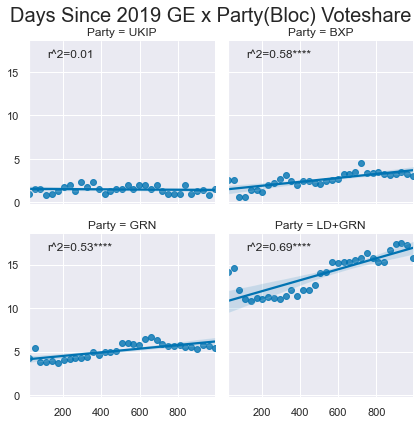

In [147]:
import seaborn as sns
import scipy as sp

# bloc_list = ['CON', 'LAB', 'LD', 'UKIP', 'BXP', 'GRN', 'LAB+LD', 'LAB+LD+GRN',
#        'CON+BXP', 'CON+BXP+UKIP', 'CON+LD', 'LAB+BXP', 'UKIP+BXP']
bloc_list = [ 'UKIP', 'BXP', 'GRN', 'LD+GRN']
col_wrap=2

data = df_flat[df_flat["Party"].isin(bloc_list)]

g = sns.lmplot(x='Days Since GE', y='Voteshare', data=data, 
               col='Party', height=3, aspect=1, col_wrap=col_wrap)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Days Since GE'], data['Voteshare'])
    ax = plt.gca()
    r = r*r
    r = 'r^2={:.2f}'.format(r)
    if p <= .05:
        r = r+"*"
    if p <= .01:
        r = r+"*"
    if p <= .001:
        r = r+"*"
    if p <= .0001:
        r = r+"*"
# https://www.graphpad.com/support/faq/what-is-the-meaning-of--or--or--in-reports-of-statistical-significance-from-prism-or-instat/
# *
# P ≤ 0.05
# **
# P ≤ 0.01
# ***
# P ≤ 0.001
# ****
#  P ≤ 0.0001 (For the last two choices only)        
             
    ax.text(.1, .9, r,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Days Since 2019 GE x Party(Bloc) Voteshare", fontsize=20);
plt.show()

In [73]:
df[df["Date"].apply(lambda x: re.search("20|21|22",x) is not None)]

,Date,Conservative,Labour,LD,UKIP,SDP,TIG,BXP,Green,Lead
455,Jan-20,46.7,30.2,9.8,1.0,NaN,NaN,2.5,4.3,16.5
456,Feb-20,46.4,30.0,9.2,NaN,NaN,NaN,2.5,5.4,16.4
457,Mar-20,50.1,29.1,8.3,1.5,NaN,NaN,0.6,3.8,21.0
458,Apr-20,51.1,30.6,7.2,0.8,NaN,NaN,0.6,3.8,20.5
459,May-20,46.5,34.6,6.9,1.0,NaN,NaN,1.4,3.9,11.9
460,Jun-20,42.8,37.7,7.4,1.3,NaN,NaN,1.4,3.7,5.1
461,Jul-20,43.4,36.8,7.0,1.7,NaN,NaN,1.2,4.0,6.6
462,Aug-20,42.1,36.9,7.1,2.0,NaN,NaN,2.0,4.2,5.2
463,Sep-20,40.7,38.4,6.9,1.3,NaN,NaN,2.2,4.3,2.4
464,Oct-20,40.1,39.0,6.7,2.3,NaN,NaN,2.7,4.3,1.1


In [ ]:
### redo for every GE?